In [2]:
import pandas as pd

In [3]:
base = pd.read_excel("../../Bases/Base_tratada.xlsx")

In [4]:
base

,V0001,V0024,UPA_PNS,V0006_PNS,V0022,A02201|A02305|A02306,C00301,C004,C006,C008,...,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604,IMC
0,11,1110011,110000016,2,4,1,4,5,2,19,...,0,Não pratica,1,13-16,Fuma atualmente,2,2,2,2,Sobrepeso
1,11,1110011,110000016,5,2,0,1,1,2,28,...,1,31-60,4,Nunca fumou,Nunca fumou,2,2,2,2,Abaixo do peso
2,11,1110011,110000016,8,4,1,2,2,2,38,...,0,Não pratica,2,21+,Fuma atualmente,2,2,2,2,Eitrófico
3,11,1110011,110000016,12,1,2,1,1,1,36,...,2,61-90,4,Nunca fumou,Nunca fumou,2,2,2,2,Sobrepeso
4,11,1110011,110000034,4,3,0,1,1,1,42,...,3,91-120,3,13-16,1-5,2,1,2,2,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,53,5310220,530041727,12,4,2,1,1,1,41,...,0,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,2,Sobrepeso
43012,53,5310220,530041727,14,3,0,1,1,1,21,...,0,Não pratica,1,13-16,Fuma atualmente,2,2,2,2,Eitrófico
43013,53,5310220,530044434,6,5,2,2,2,1,44,...,0,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,2,Eitrófico
43014,53,5310220,530044434,8,6,3,1,1,2,26,...,0,Não pratica,4,Nunca fumou,Nunca fumou,1,2,2,2,Obesidade grau 1


## Codificação de atributos

In [5]:
mapeamento = {
    'Não pratica': 0,
    '<30': 1,       
    '31-60': 2,
    '61-90': 3,
    '91-120': 4
}

# Aplicar o mapeamento à coluna 'IMC'
base['P03701|P03702'] = base['P03701|P03702'].map(mapeamento)

In [6]:
mapeamento = {
    'Nunca fumou': 0,
    '<=12': 1,       
    '13-16': 2,
    '17-20': 3,
    '21+': 4
}

# Aplicar o mapeamento à coluna 'IMC'
base['P053'] = base['P053'].map(mapeamento)

In [7]:
base['P05901|P05902|P05903|P05904'].value_counts()

P05901|P05902|P05903|P05904
Nunca fumou        30407
Fuma atualmente     4652
5-15                2994
15+                 2837
1-5                 1721
Menos de 1 ano       405
Name: count, dtype: int64

In [8]:
mapeamento = {
    'Fuma atualmente': 0,
    'Nunca fumou': 1,
    'Menos de 1 ano': 2,
    '1-5': 3,       
    '5-15': 4,
    '15+': 5,
}

# Aplicar o mapeamento à coluna 'IMC'
base['P05901|P05902|P05903|P05904'] = base['P05901|P05902|P05903|P05904'].map(mapeamento)

In [9]:
mapeamento_imc = {
    'Abaixo do peso': 0,
    'Eitrófico': 1,      
    'Sobrepeso': 2,
    'Obesidade grau 1': 3,
    'Obesidade grau 2': 4,
    'Obesidade grau 3': 5 
}

# Aplicar o mapeamento à coluna 'IMC'
base['IMC'] = base['IMC'].map(mapeamento_imc)

In [10]:
base

,V0001,V0024,UPA_PNS,V0006_PNS,V0022,A02201|A02305|A02306,C00301,C004,C006,C008,...,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604,IMC
0,11,1110011,110000016,2,4,1,4,5,2,19,...,0,0,1,2,0,2,2,2,2,2
1,11,1110011,110000016,5,2,0,1,1,2,28,...,1,2,4,0,1,2,2,2,2,0
2,11,1110011,110000016,8,4,1,2,2,2,38,...,0,0,2,4,0,2,2,2,2,1
3,11,1110011,110000016,12,1,2,1,1,1,36,...,2,3,4,0,1,2,2,2,2,2
4,11,1110011,110000034,4,3,0,1,1,1,42,...,3,4,3,2,3,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,53,5310220,530041727,12,4,2,1,1,1,41,...,0,0,4,0,1,2,2,2,2,2
43012,53,5310220,530041727,14,3,0,1,1,1,21,...,0,0,1,2,0,2,2,2,2,1
43013,53,5310220,530044434,6,5,2,2,2,1,44,...,0,0,4,0,1,2,2,2,2,1
43014,53,5310220,530044434,8,6,3,1,1,2,26,...,0,0,4,0,1,1,2,2,2,3


## Correlação

In [11]:
import seaborn as sns

<AxesSubplot: >

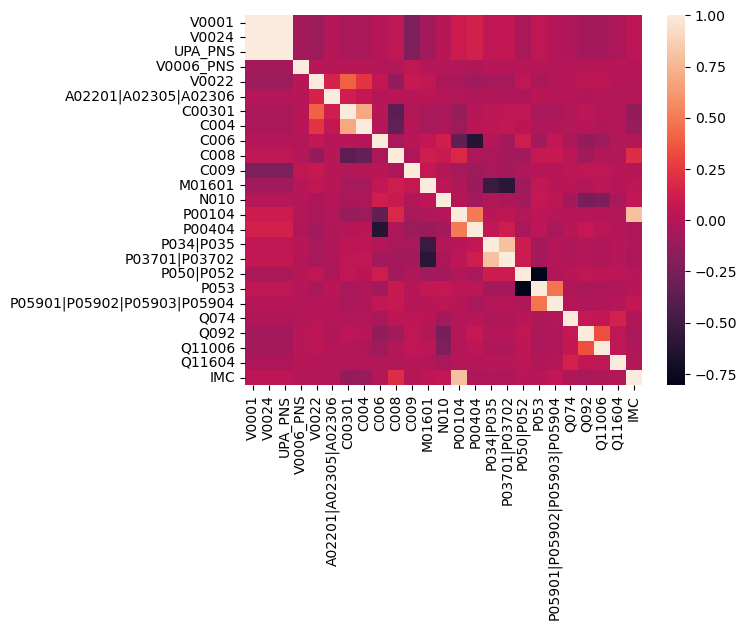

In [12]:
sns.heatmap(base.corr())

## Valores Duplicados

In [13]:
base.drop_duplicates(inplace=True)

## Separação dos valores de treino e teste

In [14]:
X_prev = base.drop(columns=['Q074'])
y_classe = base['Q074']

In [15]:
X_prev

,V0001,V0024,UPA_PNS,V0006_PNS,V0022,A02201|A02305|A02306,C00301,C004,C006,C008,...,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q092,Q11006,Q11604,IMC
0,11,1110011,110000016,2,4,1,4,5,2,19,...,152.0,0,0,1,2,0,2,2,2,2
1,11,1110011,110000016,5,2,0,1,1,2,28,...,176.0,1,2,4,0,1,2,2,2,0
2,11,1110011,110000016,8,4,1,2,2,2,38,...,156.0,0,0,2,4,0,2,2,2,1
3,11,1110011,110000016,12,1,2,1,1,1,36,...,172.0,2,3,4,0,1,2,2,2,2
4,11,1110011,110000034,4,3,0,1,1,1,42,...,185.0,3,4,3,2,3,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,53,5310220,530041727,12,4,2,1,1,1,41,...,159.0,0,0,4,0,1,2,2,2,2
43012,53,5310220,530041727,14,3,0,1,1,1,21,...,178.0,0,0,1,2,0,2,2,2,1
43013,53,5310220,530044434,6,5,2,2,2,1,44,...,162.0,0,0,4,0,1,2,2,2,1
43014,53,5310220,530044434,8,6,3,1,1,2,26,...,150.0,0,0,4,0,1,2,2,2,3


In [16]:
y_classe

0        2
1        2
2        2
3        2
4        2
        ..
43011    2
43012    2
43013    2
43014    1
43015    2
Name: Q074, Length: 43016, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size=0.3, random_state=42)

In [19]:
X_treino.shape

(30111, 24)

In [20]:
X_teste.shape

(12905, 24)

In [21]:
y_treino.value_counts()

Q074
2    28577
1     1534
Name: count, dtype: int64

In [22]:
y_teste.value_counts()

Q074
2    12229
1      676
Name: count, dtype: int64

In [23]:
import numpy as np

In [24]:
np.savez('Treino_teste/Asma.npz', X_treino=X_treino, X_teste=X_teste, y_treino=y_treino, y_teste=y_teste, feature_names=X_treino.columns)

### OverSampling

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_treino, y_treino)

In [26]:
np.savez('Treino_teste/Asma_Over.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)

### UnderSampling

In [27]:
from imblearn.under_sampling import TomekLinks
balanceamento_under = TomekLinks(sampling_strategy='auto')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [28]:
np.savez('Treino_teste/Asma_Under.npz', X_treino=X_under, X_teste=X_teste, y_treino=y_under, y_teste=y_teste, feature_names=X_treino.columns)

### Random UnderSampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_treino, y_treino)

In [30]:
np.savez('Treino_teste/Asma_RD_Under.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)

### DSTO-GAN

In [31]:
from dsto_gan import DSTO_GAN
dsto_gan = DSTO_GAN()
X_resampled, y_resampled = dsto_gan.fit_resample(X_treino.values, y_treino.values)

In [32]:
np.savez('Treino_teste/Asma_DSTO.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)